# NAME: SAI SRI DACHEPALLI

## TOP 25 Instagram users by followers

## Question:

### Find Instagram accounts with highest number of followers, highest number of posts and compare whether top followed accounts have highest posts than the other accounts with less number of followers.

##### To find solution, I am using "socialblade website". I web scraped top 25 Instagram accounts by followers and posts, and collected observations. I Cleaned the data collected and Visualized the observations.

In [18]:
###### Libraries imported
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [19]:
# website used for web scraping
url = "https://socialblade.com/instagram/"

In [20]:
# sending html requests to the site
html = requests.get(url)
results = html.text

### Pickling data

In [21]:
import pickle
# pickling data
with open('data.pkl', 'wb') as f:
    pickle.dump(results, f)

# loading data from a pickle file
with open('data.pkl', 'rb') as f:
    new_results = pickle.load(f)
    print(type(new_results))

<class 'str'>


In [22]:
## Extracting the results from the new_results and storing it in soup
soup = BeautifulSoup(new_results)
body = soup.findAll("div",{"class": "table-body"})


In [23]:
def prepare_table_row(row):
    lst = [i.text for i in row if i !=u'\n']
    #return lst
    return dict(rank = int(lst[0]), grade = str(lst[1]), username = str(lst[2]),Name = str(lst[3]), posts = float(lst[4].replace(",","")), followers = float(lst[5].replace(",","")), following = float(lst[6].replace(",","")))

In [24]:
# printing the result of first row
print(prepare_table_row(body[0]))

{'rank': 1, 'grade': 'A++ ', 'username': 'therock', 'Name': 'therock', 'posts': 4279.0, 'followers': 145664920.0, 'following': 370.0}


In [25]:
# performing iterations to obtain all the results
data = []
for tr in body:
    datum = prepare_table_row(tr)
    for a in tr.find_all('a', href= True):
        datum['url'] = a['href']
    data.append(datum)

In [26]:
# storing the result in pandas data frame
df = pd.DataFrame(data)
df

,Name,followers,following,grade,posts,rank,url,username
0,therock,145664920.0,370.0,A++,4279.0,1,/instagram/user/therock,therock
1,Leo Messi,124029288.0,228.0,A++,475.0,2,/instagram/user/leomessi,leomessi
2,3n310ta,113580705.0,993.0,A++,4430.0,3,/instagram/user/neymarjr,neymarjr
3,National Geographic,112499187.0,131.0,A++,20496.0,4,/instagram/user/natgeo,natgeo
4,Jennifer Lopez,95822311.0,1102.0,A++,2584.0,5,/instagram/user/jlo,jlo
5,Miley Cyrus,94927303.0,780.0,A++,333.0,6,/instagram/user/mileycyrus,mileycyrus
6,nike,89498040.0,54.0,A++,733.0,7,/instagram/user/nike,nike
7,KATY PERRY,83383445.0,473.0,A++,1254.0,8,/instagram/user/katyperry,katyperry
8,Kevin Hart,76354833.0,554.0,A++,6372.0,9,/instagram/user/kevinhart4real,kevinhart4real
9,Real Madrid C.F.,74299142.0,40.0,A++,2758.0,10,/instagram/user/realmadrid,realmadrid


### Cleaning data

In [27]:
# remove unused columns
df.drop(df.columns[[5,6]], axis=1, inplace=True)
df.head(25)

,Name,followers,following,grade,posts,username
0,therock,145664920.0,370.0,A++,4279.0,therock
1,Leo Messi,124029288.0,228.0,A++,475.0,leomessi
2,3n310ta,113580705.0,993.0,A++,4430.0,neymarjr
3,National Geographic,112499187.0,131.0,A++,20496.0,natgeo
4,Jennifer Lopez,95822311.0,1102.0,A++,2584.0,jlo
5,Miley Cyrus,94927303.0,780.0,A++,333.0,mileycyrus
6,nike,89498040.0,54.0,A++,733.0,nike
7,KATY PERRY,83383445.0,473.0,A++,1254.0,katyperry
8,Kevin Hart,76354833.0,554.0,A++,6372.0,kevinhart4real
9,Real Madrid C.F.,74299142.0,40.0,A++,2758.0,realmadrid


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
#%matplotlib inline

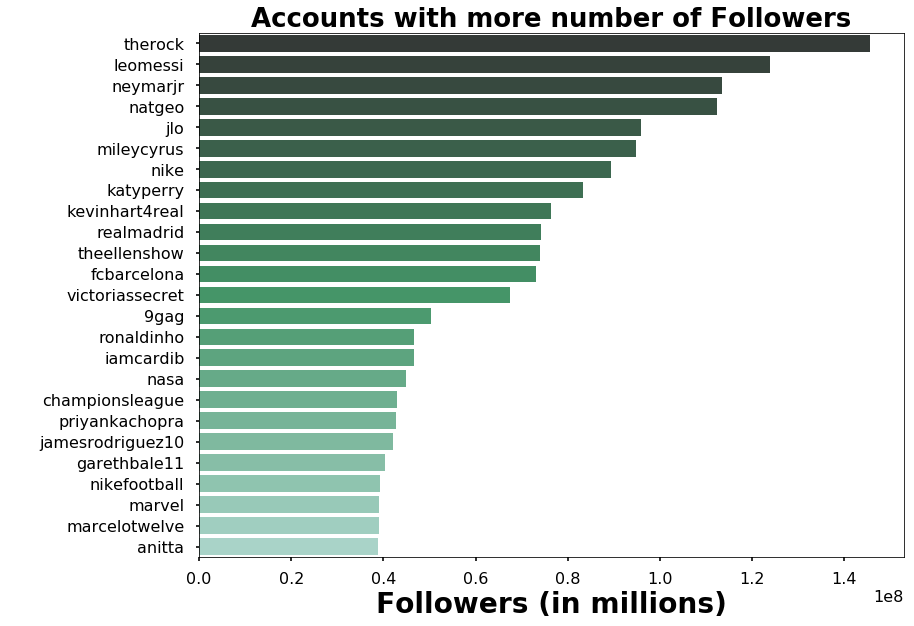

In [29]:
ax = sns.barplot(x="followers", y="username", data= df, palette=("BuGn_d"))
style.use('seaborn-poster')
plt.title('Accounts with more number of Followers', fontweight='bold',fontsize =26)
plt.xlabel("Followers (in millions)", fontweight='bold',fontsize =28)
plt.ylabel(" ", fontweight='bold',fontsize =28)
plt.tight_layout()
plt.savefig('subscribers.png', Transparent = True)


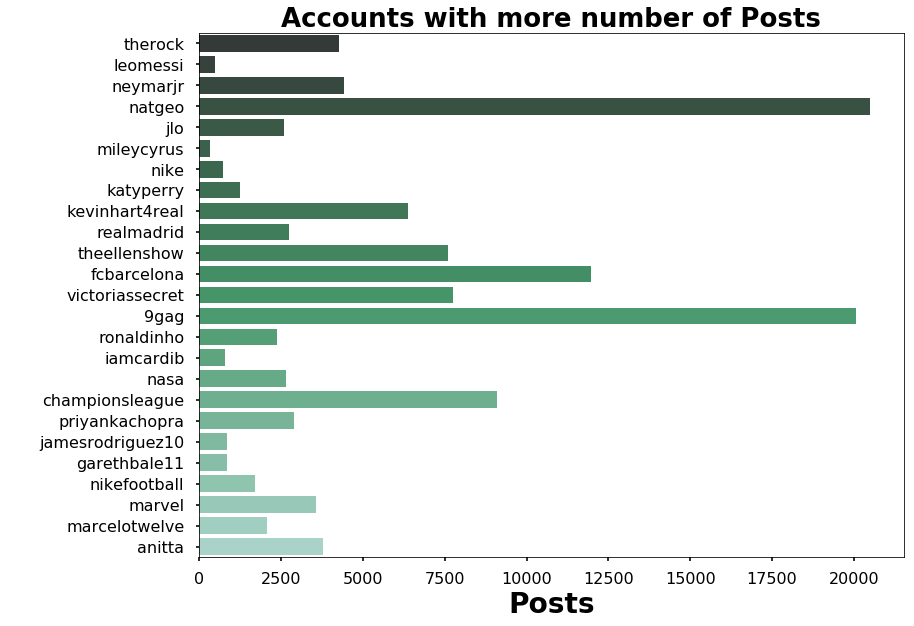

In [30]:
ax = sns.barplot(x="posts", y="username", data= df, palette=("BuGn_d"))
#sns.set_context("poster")
#style.use('seaborn-poster')
plt.title('Accounts with more number of Posts', fontweight='bold',fontsize =26)
plt.xlabel("Posts", fontweight='bold',fontsize =28)
plt.ylabel(" ", fontweight='bold',fontsize =28)
plt.tight_layout()
plt.savefig('views.png', Transparent = True)

## Conclusion:

### From the above graphs, we can clearly state that "therock" has highest number of followers but not highest number of posts as we can see "natgeo" has highest number of posts.

### Also, 9gag which has second highest posts, has less number of followers compared to the accounts with highest followers

### So, from the above two graphs we can conclude that, an account with highest number of followers need not have highest number of posts and we can also conclude that an account with highest number of posts need not be an account with highest followers.